<a href="https://colab.research.google.com/github/matiasvallejosdev/my-face-recognition/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
 
from time import time #importamos la función time para capturar tiempos

## Preprocesing multiples images
Paper reference:
[Image Pre-processing Using OpenCV Library on MORPH-II Face Database](https://uncw.edu/math/reu/documents/image-pre-processing.pdf)

## 1. Preparing alghoritm (Helpers)

1. Initialize in memory classifiers
2. Set parameters for cascade classifiers
3. Get data images_faces from drive

### Step 1.1

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
from google.colab.patches import cv2_imshow

In [4]:
# Prepare data
faces_cascade = '/content/drive/My Drive/Machine Learning/haarcascade_frontalface_alt2.xml'
eyes_cascade = '/content/drive/My Drive/Machine Learning/haarcascade_eye_tree_eyeglasses.xml'

In [5]:
faces_cascade = cv2.CascadeClassifier(faces_cascade)
eyes_cascade = cv2.CascadeClassifier(eyes_cascade)

print("Load faces and eyes haarcascade")

Load faces and eyes haarcascade


### Step 1.2

In [42]:
## Faces
faceScale = 1.1
faceMinNeighborgs = 5
faceFlags = 1
## Eyes
eyeScale = 1.049872
eyesMinNeighborgs = 5
eyesFlags = 1

print("Face scale is:", faceScale)
print("Face minimal neighborgs is:", faceMinNeighborgs)
print("Face flags is:", faceFlags)

print("\nEye scale is:", eyeScale)
print("Eye minimal neighborgs is:", eyesMinNeighborgs)
print("Eye flags is:", eyesFlags)

Face scale is: 1.1
Face minimal neighborgs is: 5
Face flags is: 1

Eye scale is: 1.049872
Eye minimal neighborgs is: 5
Eye flags is: 1


### Step 1.3

In [ ]:
!ls "/content/drive/My Drive/Machine Learning/Dataset"

In [47]:
# Get data and preparing
url_datapath = '/content/drive/My Drive/Machine Learning/Dataset/Me'
img_names= os.listdir(url_datapath)

print("Preparing data..")
print("Datapath from drive is:", url_datapath)
print("Total images collected:", len(img_names))

Preparing data..
Datapath from drive is: /content/drive/My Drive/Machine Learning/Dataset/Me
Total images collected: 3899



## 2. Preparing data for training a deep neural network

1. Convert to grayscale
2. Face detection
3. Eye detection
4. Image Rotation
5. Face and Eye Re-detection
6. Cropping and Scaling
7. Manual Preprocesing Undetactable Images


### Step 2.0

In [41]:
def GetFace(imgColor, imgGray, scale, minNeig, maxToCrop = 1, flags = 1):
    faceColor_crop = []
    faceGray_crop = []

    faceDetection = faces_cascade.detectMultiScale(imgGray, scale, minNeig)

    print('Can detect(face): ', len(faceDetection))

    for f in faceDetection:
        x, y, w, h = [ v for v in f ]
        cv2.rectangle(imgGray, (x, y), (x+w, y+h), (255, 0, 0), 4)
        cv2.rectangle(imgColor, (x, y), (x+w, y+h), (255, 0, 0), 4)
        """if len(faceDetection) == maxToCrop:
            cv2.imshow("Image", imgGray)
            cv2.waitKey(500)"""
            
    if len(faceDetection) == maxToCrop:
      faceGray_crop.append(imgGray[y:y+h, x:x+w])
      faceColor_crop.append(imgColor[y:y+h, x:x+w])

    return faceDetection, faceGray_crop, faceColor_crop

### Step 1.1


Read Image:  Me (3822).jpg
Can detect(face):  0

Read Image:  Me (3829).jpg
Can detect(face):  0

Read Image:  Me (3785).jpg
Can detect(face):  3

Read Image:  Me (3801).jpg
Can detect(face):  1


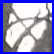


Read Image:  Me (3805).jpg


KeyboardInterrupt: ignored

In [55]:
min_image = 3050
max_image = 3060

fail = 0
correct = 0
incorrect = 0

tiempo_inicial = time() 

for imgname in img_names[min_image : max_image]:
      
    img_path = os.path.join(url_datapath, imgname)
    img = cv2.imread(img_path)

    print('\nRead Image: ', imgname)

    try:
        # 1. Convert to gray scale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        """cv2.imshow("OpenCV",gray)
        cv2.waitKey(0)
        cv2.destroyAllWindows() """

        # 2. Face detection
        faceDetection, faceGray_crop, faceColor_crop = GetFace(img, gray, faceScale, faceMinNeighborgs)

        if len(faceDetection) == 1:
            correct = correct + 1
            cv2_imshow(faceColor_crop[0])
            #cv2.waitKey(200)
            #cv2.destroyAllWindows()
             
        if len(faceDetection) == 0 or len(faceDetection) > 1:
            incorrect = incorrect + 1 

        #SaveImage(img, len(facesDetection), len(eyesDetection), index)
    except Exception as e:
        fail = fail + 1
        print('Exception:', e)

tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('\nData process succesfull: ', correct)
print('Data process incorrect: ', incorrect)
print('Accuracy: ', (correct / (correct + incorrect)) * 100)
print('Have exceptions: ', fail)
print('Finish ejecution in: ', tiempo_ejecucion)

In [ ]:
        # 3. Eye detections
        eyesDetection, face, faceEyeGray_crop = GetEyesDetection(img, gray, facesDetection)
        # 4. Rotation

        # 5. Face and eye re-detection

        # 6. Cropping and scaling
        
        #ShowImage(img, faceEyeColor_crop)
        #face_crop = GetCropFaces(gray, facesDetection)
        # Saving